In [132]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import numpy as np
import matplotlib.pyplot as plt

- FP Generation
- Bit Clashing 
- FP Clustering for Property Prediction

In [133]:
mol1 = Chem.MolFromSmiles('O=C1c2c3ccccc3n(C)c2CCC1Cn4ccnc4C')
mol2 = Chem.MolFromSmiles('O=C(N5CON(c4ccc(OC[C@@H]1O[C@](OC1)(c2ccc(Cl)cc2Cl)Cn3ccnc3)cc4)CC5)C')

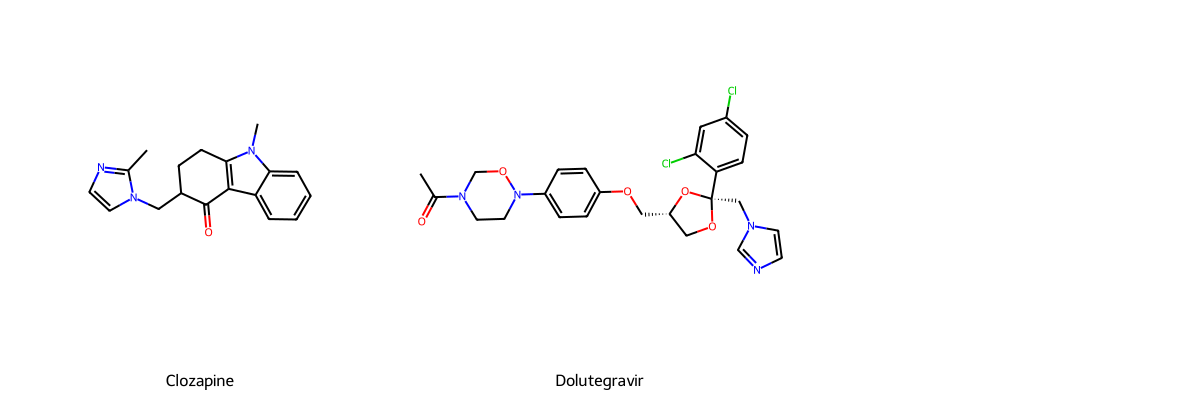

In [134]:
Draw.MolsToGridImage([mol1, mol2], subImgSize=(400, 400), legends = ['Clozapine','Dolutegravir'])

In [135]:
# create an empty dictionary to store the bit information
info1, info2 = {}, {}

fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=4096, bitInfo=info1, useFeatures=True)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=4096, bitInfo=info2, useFeatures=True)

#Generating a Morgan Fingerprint as a bit vector of 4096 bits.
#This can be converted to a numpy array of 1's andd 0's.
#We can also see which functional groups get encoded as 1's and which are encoded as 0's. 
#Molecules with the same "on" index in the fingerprint bit vector means they have same/similar substructure.

arr = np.zeros((0,))
Chem.DataStructs.ConvertToNumpyArray(fp1, arr)
print(list(fp1.GetOnBits()))
arr[0:100]

[0, 2, 4, 6, 80, 350, 414, 421, 461, 596, 804, 968, 1041, 1155, 1352, 1395, 1405, 1537, 1668, 1741, 1770, 1991, 2017, 2039, 2111, 2136, 2300, 2400, 2445, 2476, 2490, 2543, 2603, 2646, 2767, 2840, 2850, 2852, 3014, 3056, 3263, 3265, 3271, 3422, 3426, 3514, 3627, 3673, 3756, 3811, 3816, 3911, 3927, 3941, 3965, 4088]


array([1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [136]:
print(list(fp2.GetOnBits()))

[0, 2, 4, 6, 8, 194, 224, 228, 277, 380, 535, 549, 596, 628, 647, 650, 716, 868, 886, 909, 988, 1155, 1212, 1278, 1295, 1371, 1461, 1494, 1556, 1668, 1674, 1732, 1737, 1739, 1747, 1849, 1850, 1889, 1915, 1988, 1990, 2017, 2039, 2040, 2089, 2136, 2145, 2175, 2318, 2365, 2397, 2425, 2476, 2506, 2539, 2543, 2694, 2742, 2761, 2840, 2850, 2854, 2968, 3014, 3131, 3133, 3160, 3421, 3492, 3604, 3644, 3648, 3771, 3794, 3818, 3822, 4085, 4088]


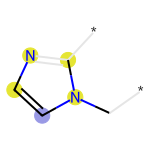

In [137]:
Draw.DrawMorganBit(mol1, 2136, info1, useSVG=True)

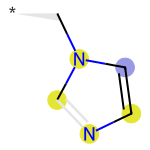

In [138]:
Draw.DrawMorganBit(mol2, 2136, info2, useSVG=True)

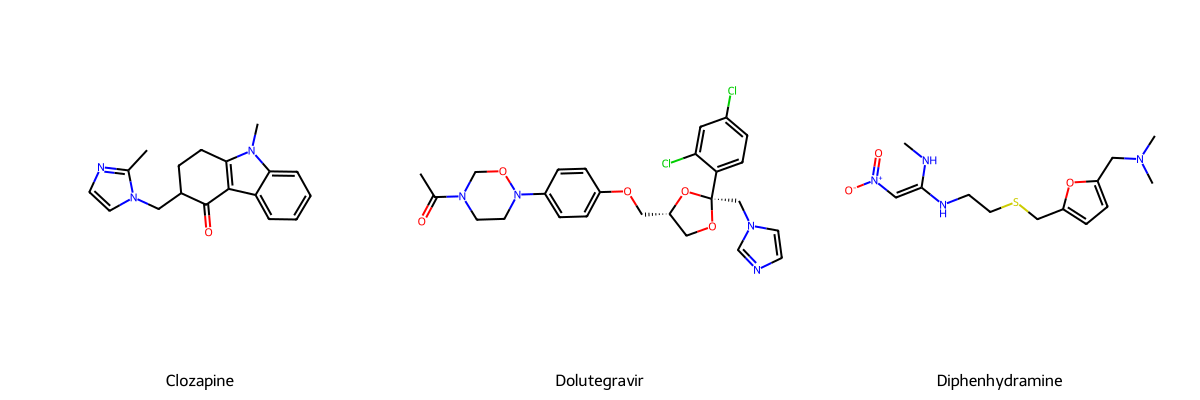

In [139]:
### Adding a third molecule

mol3 = Chem.MolFromSmiles('CNC(=C[N+](=O)[O-])NCCSCC1=CC=C(O1)CN(C)C')
Draw.MolsToGridImage([mol1, mol2, mol3], subImgSize=(400, 400), legends = ['Clozapine','Dolutegravir','Diphenhydramine'])

In [140]:
info1, info2, info3 = {},{},{}

fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=4096, bitInfo=info1, useFeatures=True)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=4096, bitInfo=info2, useFeatures=True)
fp3 = AllChem.GetMorganFingerprintAsBitVect(mol3, 3, nBits=4096, bitInfo=info3, useFeatures=True)


In [141]:
## Commom finger prints in the three molecules 

common = set(fp1.GetOnBits()) & set(fp2.GetOnBits()) & set(fp3.GetOnBits())
common

{0, 2, 4, 6, 1155, 2017}

In [142]:
list(common)

[0, 2017, 2, 1155, 4, 6]

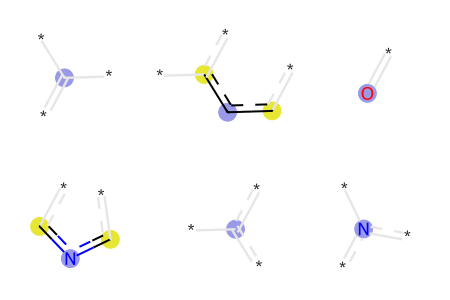

In [143]:
Draw.DrawMorganBits([(mol2,x,info2) for x in list(common)])

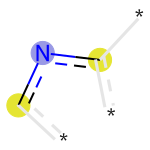

In [144]:
Draw.DrawMorganBit(mol1, 1155, info1, useSVG=True)


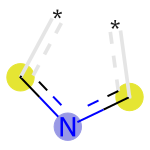

In [145]:
Draw.DrawMorganBit(mol2, 1155, info2, useSVG=True)

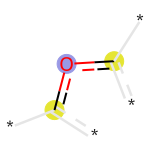

In [146]:
Draw.DrawMorganBit(mol3, 1155, info3, useSVG=True)

We can see fingerprints clashing occuring here.
Bit #1155 has multiple substructures folded into it.
One way we can manage this problem is by increasing the number of bits ("unfolding the fingerprint")

In [147]:
print(len(list(fp1.GetOnBits())))
print(len(list(fp2.GetOnBits())))
print(len(list(fp3.GetOnBits())))

56
78
52


In [148]:
## Combined finger prints in the three molecules 
## Check how many bits you have in use, across all of our fingerprints 

combined = set(fp1.GetOnBits()) | set(fp2.GetOnBits()) | set(fp3.GetOnBits())
len(list(combined))

159

means we are using 159 out of the 4096 bits

185
192
196
198
199
199
199
199
199
200
200
200
200


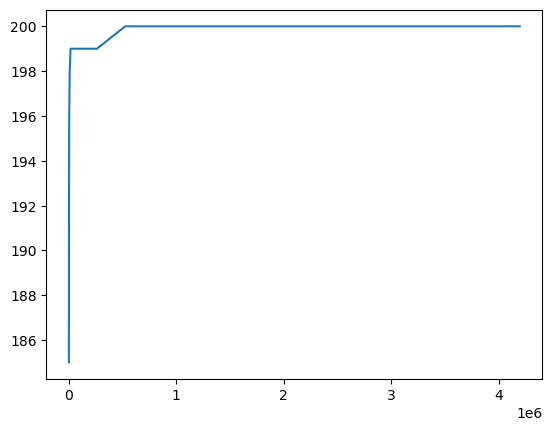

In [217]:
## We increase the nbits vector (number of bits) to where the number of bits in use gets maximized. 


info1, info2, info3 = {},{},{}

BitLength = [1024,2048,4096,8192,16384,32768,65536,131072,262144,524288,1048576,2097152,4194304]
combined_length = []

for bits in BitLength:

    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=bits, bitInfo=info1)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=bits, bitInfo=info2)
    fp3 = AllChem.GetMorganFingerprintAsBitVect(mol3, 3, nBits=bits, bitInfo=info3)
    
    combined = set(fp1.GetOnBits()) | set(fp2.GetOnBits()) | set(fp3.GetOnBits())
    print(len(list(combined)))
    combined_length.append(len(list(combined)))
    
plt.plot(BitLength, combined_length)   
    

+ It looks like our maximum number of occupied bits plateau at 200, if we want maximal diversity in our fingerprints with no overlapping.
+ Also, using "useFeatures=True" dosen't work well for me. I still experience bit clsahing. 

In [241]:
info1, info2, info3 = {},{},{}

fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=524288, bitInfo=info1)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=524288, bitInfo=info2)
fp3 = AllChem.GetMorganFingerprintAsBitVect(mol3, 3, nBits=524288,  bitInfo=info3)

## Commom finger prints in the three molecules 
common = set(fp1.GetOnBits()) & set(fp2.GetOnBits()) & set(fp3.GetOnBits())
common

{89937, 154657, 167638, 349540, 383056, 391818}

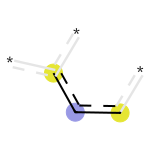

In [238]:
Draw.DrawMorganBit(mol1, 167638, info1, useSVG=True)

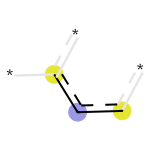

In [239]:
Draw.DrawMorganBit(mol2, 167638, info2, useSVG=True)

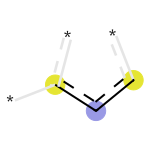

In [240]:
Draw.DrawMorganBit(mol3, 167638, info3, useSVG=True)